In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress
import scipy.stats as sts

In [2]:
# import data scv
data = pd.read_csv('spotify-data.csv')
data.head()

,artist_name,artist_genres,album_id,album_name,track_id,track_name,streams (millions),popularity,release_date,markets,...,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,Ed Sheeran,"['pop', 'uk pop']",3T4tUhGYeRNVUGevb0wThu,÷ (Deluxe),7qiZfU4dY1lWllzX7mPBI3,Shape of You,"2,989",87,2017-03-03,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",...,0.0931,-3.183,0.0,0.0802,95.977,4.0,https://api.spotify.com/v1/tracks/7qiZfU4dY1lW...,audio_features,spotify:track:7qiZfU4dY1lWllzX7mPBI3,0.931
1,The Weeknd,"['canadian contemporary r&b', 'canadian pop', ...",4yP0hdKOZPNshxUOjY0cZj,After Hours,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,"2,673",93,2020-03-20,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",...,0.0897,-5.934,1.0,0.0598,171.005,4.0,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,audio_features,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,0.334
2,Tones And I,"['australian pop', 'pop']",0UywfDKYlyiu1b38DRrzYD,Dance Monkey (Stripped Back) / Dance Monkey,2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,"2,425",82,2019-10-17,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",...,0.1490,-6.400,0.0,0.0924,98.027,4.0,https://api.spotify.com/v1/tracks/2XU0oxnq2qxC...,audio_features,spotify:track:2XU0oxnq2qxCpomAAuJY8K,0.513
3,Post Malone,"['dfw rap', 'melodic rap', 'rap']",6trNtQUgC8cgbWcqoMYkOR,beerbongs & bentleys,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage),"2,312",85,2018-04-27,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",...,0.1310,-6.136,0.0,0.0712,159.801,4.0,https://api.spotify.com/v1/tracks/0e7ipj03S05B...,audio_features,spotify:track:0e7ipj03S05BNilyu5bRzt,0.129
4,Lewis Capaldi,"['pop', 'uk pop']",5658aM19fA3JVwTK6eQX70,Divinely Uninspired To A Hellish Extent,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,"2,182",88,2019-05-17,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",...,0.1050,-5.679,1.0,0.0319,109.891,4.0,https://api.spotify.com/v1/tracks/7qEHsqek33rT...,audio_features,spotify:track:7qEHsqek33rTcFNT9PFqLf,0.446


In [3]:
df = data[['track_id','streams (millions)', 'energy', 'tempo', 'acousticness']]
df.index += 1
df.head()

,track_id,streams (millions),energy,tempo,acousticness
1,7qiZfU4dY1lWllzX7mPBI3,"2,989",0.652,95.977,0.58100
2,0VjIjW4GlUZAMYd2vXMi3b,"2,673",0.730,171.005,0.00146
3,2XU0oxnq2qxCpomAAuJY8K,"2,425",0.588,98.027,0.69200
4,0e7ipj03S05BNilyu5bRzt,"2,312",0.520,159.801,0.12400
5,7qEHsqek33rTcFNT9PFqLf,"2,182",0.405,109.891,0.75100


In [4]:
energy = df['energy']
energy.max()

0.922

In [5]:
tempo = df['tempo']
tempo.max()

186.003

The r-squared is: 0.08377138532967249
The r value is: 0.2894328684335497


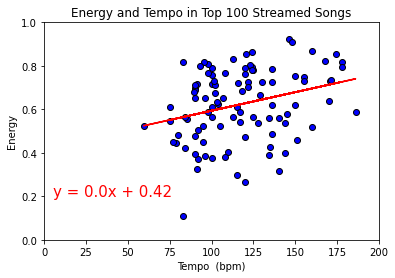

In [24]:
plt.scatter(df.tempo, df.energy , marker="o", facecolors="blue", edgecolors="black")
plt.xlim([0, 200])
plt.ylim([0, 1])
plt.xlabel('Tempo  (bpm)')
plt.ylabel('Energy')
plt.title('Energy and Tempo in Top 100 Streamed Songs')
slope, intercept, rvalue, pvalue, stderr = linregress(tempo, energy)
regression = tempo * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(tempo, regression, "r-")
plt.annotate(line_eq,(5,0.2),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
print(f"The r value is: {rvalue}")

plt.savefig('data_images/EandT.png')

In [7]:
sts.ttest_ind(tempo,energy)

Ttest_indResult(statistic=41.80041813512385, pvalue=3.4423777642815473e-100)

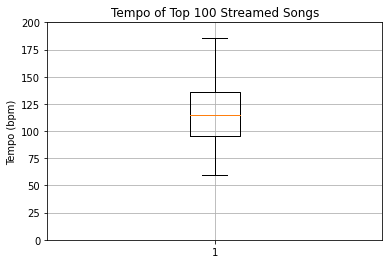

<Figure size 432x288 with 0 Axes>

In [8]:
fig1, ax1 = plt.subplots()
ax1.set_title('Tempo of Top 100 Streamed Songs')
ax1.set_ylabel('Tempo (bpm)')
ax1.boxplot(tempo)
plt.ylim([0, 200])
plt.grid()
plt.show()

plt.savefig('data_images/Tempo.png')

In [9]:
quartiles = tempo.quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


print(f"The lower quartile of tempo is: {lowerq}")
print(f"The upper quartile of tempo is: {upperq}")
print(f"The interquartile range of tempo is: {iqr}")
print(f"The the median of tempo is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tempo is: 95.305
The upper quartile of tempo is: 136.041
The interquartile range of tempo is: 40.73599999999999
The the median of tempo is: 115.136 
Values below 34.20100000000002 could be outliers.
Values above 197.14499999999998 could be outliers.


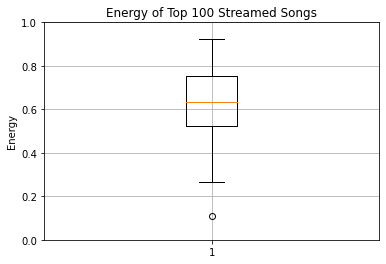

<Figure size 432x288 with 0 Axes>

In [10]:
fig1, ax1 = plt.subplots()
ax1.set_title('Energy of Top 100 Streamed Songs')
ax1.set_ylabel('Energy')
ax1.boxplot(energy)
plt.ylim([0, 1])
plt.grid()
plt.show()

plt.savefig('data_images/Energy.png')

In [11]:
quartiles = energy.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of energy is: {lowerq}")
print(f"The upper quartile of energy is: {upperq}")
print(f"The interquartile range of energy is: {iqr}")
print(f"The the median of energy is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of energy is: 0.5215000000000001
The upper quartile of energy is: 0.7555000000000001
The interquartile range of energy is: 0.23399999999999999
The the median of energy is: 0.636 
Values below 0.1705000000000001 could be outliers.
Values above 1.1065 could be outliers.


In [12]:
sts.ttest_ind(energy,tempo)

Ttest_indResult(statistic=-41.80041813512385, pvalue=3.4423777642815473e-100)

In [13]:
energy = df['energy']
energy.max()

0.922

In [14]:
acousticness = df['acousticness']
acousticness.max()

0.978

The r-squared is: 0.5028258200105351
The r value is: -0.7091021224129392


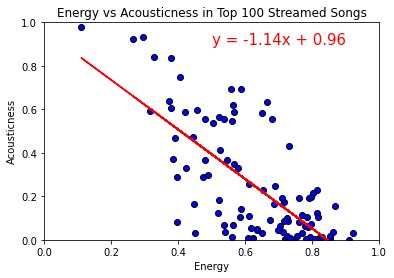

In [27]:
plt.scatter(df.energy, df.acousticness , marker="o", facecolors="blue", edgecolors="black")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Energy')
plt.ylabel('Acousticness')
plt.title('Energy vs Acousticness in Top 100 Streamed Songs')
slope, intercept, rvalue, pvalue, stderr = linregress(energy, acousticness)
regression = energy * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(energy, regression, "r-")
plt.annotate(line_eq,(0.5,0.9),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
print(f"The r value is: {rvalue}")

plt.savefig('data_images/EandA.png')

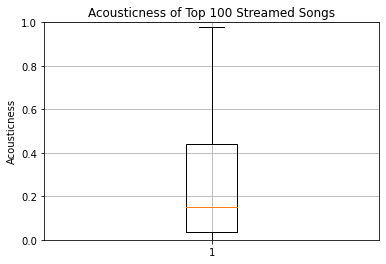

<Figure size 432x288 with 0 Axes>

In [20]:
fig1, ax1 = plt.subplots()
ax1.set_title('Acousticness of Top 100 Streamed Songs')
ax1.set_ylabel('Acousticness')
ax1.boxplot(acousticness)
plt.ylim([0,1])
plt.grid()
plt.show()

plt.savefig('data_images/Acousticness.png')